【課程名稱】<font color=#FF0000>AI機器學習(Machine Learning, ML)</font><br>
【授課講師】[陳祥輝 (mail : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【相關課程】[東吳推廣數位資訊學苑陳祥輝老師的課程表](https://www.ext.scu.edu.tw/courses_search.php?key=陳祥輝)<br>

【課程大綱】
- 處理不平衡資料
    - SMOTE : Synthetic Minority Oversampling Technique
        - A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.
- 遺漏值得插補方法        
    - MICE : Multiple Imputation by Chained Equations
        - MICE is a multiple imputation method used to replace missing data values in a data set under certain assumptions about the data missingness mechanism (e.g., the data are missing at random, the data are missing completely at random).     

#### [Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html) (遺漏值的插補法)
- Univariate Imputation
    - Univariate Imputation algorithm imputes values in the i-th feature dimension using only non-missing values in that feature dimension .
    - e.g. `sklearn.impute.SimpleImputer`
- Multivariate Imputation
    - Multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values .
    - e.g. `sklearn.impute.IterativeImputer`

<font color=#0000FF>安裝主要的模組</font>

In [17]:
# !conda env list

In [16]:
# !pip install --upgrade scikit-learn

In [15]:
# !pip install -U imbalanced-learn

In [14]:
# !pip install -U impyute

In [26]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import nan_euclidean_distances
from sklearn.impute import KNNImputer, SimpleImputer

import imblearn, impyute, collections
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from collections import Counter

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【Python】{}".format(python_version()))
print("【imblearn】{}".format(imblearn.__version__))
print("【impyute】{}".format(impyute.__version__))

# %autosave 120

【日期時間】2025/04/04 20:48:27
【工作目錄】d:\NTPU_class\ml\code
【Python】3.10.5
【imblearn】0.13.0
【impyute】0.0.8


In [27]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字型為微軟正黑體
# plt.rcParams['axes.unicode_minus'] = False                # 解決負號顯示問題

# macfont = FontProperties(fname="/Library/Fonts/Arial Unicode.ttf", size=10) 

### <font color='red'>1. 處理不平衡類別資料(Imbalanced Classification)</font>

#### 處理不平衡資料的幾種方法
- Generating synthetic data (生成綜合數據)
- Oversampling (過採樣)
- Undersampling (欠採樣)

### <font color=#0000FF>SMOTE : Synthetic Minority Oversampling Technique</font>
- 限制 : X 資料集必須為數值型態，所以必須將文字型態的屬性編碼成數值型態

##### 【資料來源】[SMOTE(Synthetic Minority Over-sampling Technique)](https://medium.com/@parthdholakiya180/smote-synthetic-minority-over-sampling-technique-4d5a5d69d720)

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*CeOd_Wbn7O6kpjSTKTIUog.png" width=700 align=left></img>

#### 原有資料的探索

- from sklearn.datasets import make_classification
- from collections import Counter

#### <font color=#0000FF>產生模擬資料</font>

In [ ]:
from sklearn.datasets import make_classification
from collections import Counter

In [29]:
X, y = make_classification(n_samples=10000, 
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.99, 0.01],
                           flip_y=0,
                           random_state=1)
# 產生虛擬資料 目的是觀察一下

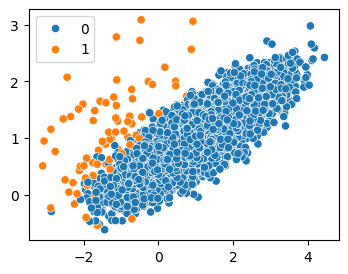

In [30]:
# [:, 0] 所有的列 第0個column
# 這裡的是原本的樣本是不會重複出現的 
# 主要是物以類聚的概念
plt.figure(figsize=[4, 3])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()
# 之前有說過的拔靴法： 重點是樣本會重複出現 拿出放回

#### 經過SMOTE後的資料探索

- from sklearn.datasets import make_classification
- from collections import Counter
- from imblearn.over_sampling import SMOTE

#### <font color=#0000FF>產生模擬資料</font>

In [32]:
X, y = make_classification(n_samples=10000, 
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.99, 0.01],
                           flip_y=0,
                           random_state=1)

In [33]:
smote = SMOTE(sampling_strategy='auto',          # 抽樣的策略
              random_state=None,                 # seed
              k_neighbors=5)                     # k 鄰近幾個點
X_smote, y_smote = smote.fit_resample(X, y)

print("---【Original】----------")
print(Counter(y))
print("---【Smote】----------")
print(Counter(y_smote))
# 有些會沒辦法抽到太遠的地方去

---【Original】----------
Counter({np.int64(0): 9900, np.int64(1): 100})
---【Smote】----------
Counter({np.int64(0): 9900, np.int64(1): 9900})


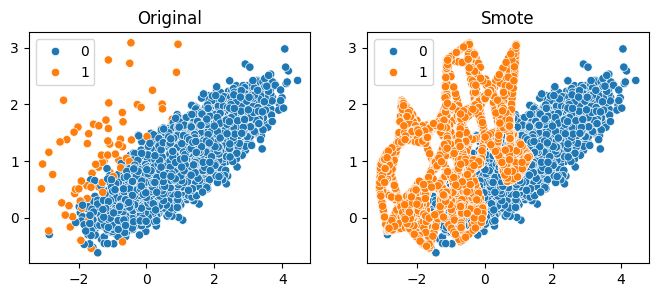

In [34]:
plt.figure(figsize=[8, 3])
plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.title("Original")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_smote[:,0], y=X_smote[:,1], hue=y_smote)
plt.title("Smote")
plt.show()

### <font color=blue>SMOTE+ENN (Edited Nearest Neighbor) = Over Sampling + Under Sampling</font>
- 【資料來源】<https://www.researchgate.net/figure/Illustration-of-SMOTE-ENN_fig1_353356456>

<img src="https://www.researchgate.net/publication/353356456/figure/fig1/AS:1050355626430464@1627435704061/Illustration-of-SMOTE-ENN.png" width=800 align=left></img>

In [35]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [36]:
smote_enn = SMOTEENN(sampling_strategy='auto',       # 抽樣策略
                     random_state=None,              # seed
                     smote=None,                     # 如果給none就是預設值 - SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5)
                     # smote=SMOTE(k_neighbors=5),   # 如果你想要自己設定參數就是這樣打進去 把你想要打的參數都打進去
                     enn=None,                       # 如果給none就是預設值 - EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3, kind_sel='all', n_jobs=None)
                     # enn=EditedNearestNeighbours(n_neighbors=3)  # 自己設定again
                     n_jobs=-1,)                     # n_jobs : 使用的 CPU 的核心數
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X, y)

print("---【Original】----------")
print(Counter(y))
print("---【Smote】----------")
print(Counter(y_smote))
print("---【Smote_ENN】----------")
print(Counter(y_smote_enn))
# 重疊區會把他盡量去消擬

---【Original】----------
Counter({np.int64(0): 9900, np.int64(1): 100})
---【Smote】----------
Counter({np.int64(0): 9900, np.int64(1): 9900})
---【Smote_ENN】----------
Counter({np.int64(1): 8958, np.int64(0): 8667})


Text(0.5, 1.0, 'Smote_ENN')

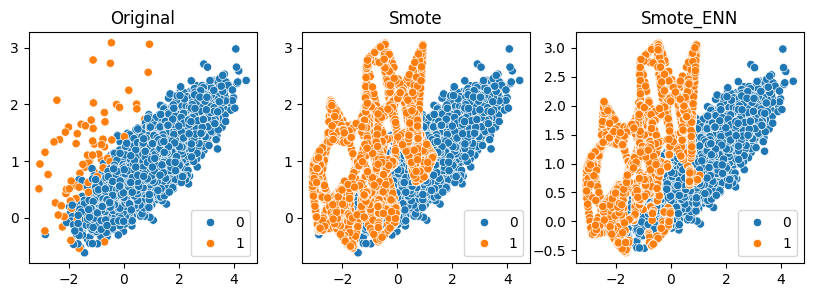

In [37]:
plt.figure(figsize=[10, 3])
plt.subplot(1, 3, 1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.title("Original")

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_smote[:,0], y=X_smote[:,1], hue=y_smote)
plt.title("Smote")

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_smote_enn[:,0], y=X_smote_enn[:,1], hue=y_smote_enn)
plt.title("Smote_ENN")

##### 訓練及和測試及都要看一下  
##### 不能只看訓練及而已 如果訓練及提升 測試及沒有提生的話 表示這個方法不適合歐歐歐

### <font color=blue>SMOTE + Tomek Links = Over Sampling + Under Sampling</font>
- 【資料來源】[SMOTE and Tomek Links for imbalanced data](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data)

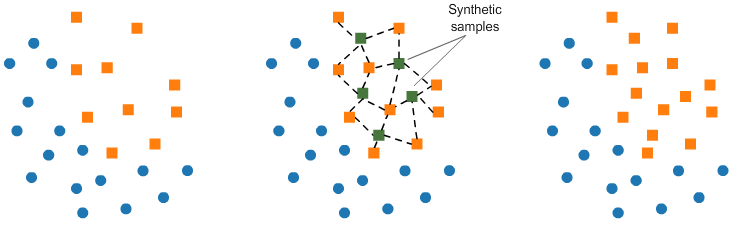SMOTE</img>

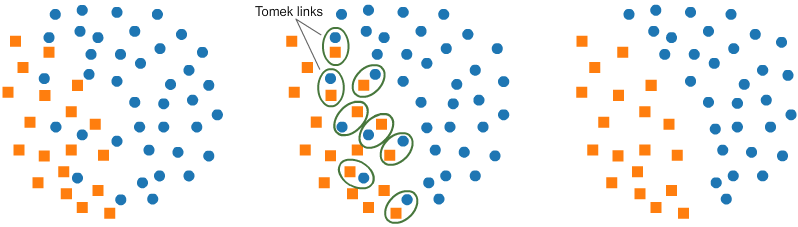Timek Links</img>

##### 跟剛剛其實有點類似 他就是要找到相鄰近的
##### 刪除掉多的那一塊
##### 這就會跟你的策略會有關係的
##### 好像很多人寫論文都會用 smote + enn 或是 smote + link

In [38]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [ ]:
smote_tomek = SMOTETomek(sampling_strategy='auto',     # 抽樣策略
                         random_state=None,            # seed
                         smote=None,                   # SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5)
                         tomek=None,                   # EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3, kind_sel='all', n_jobs=None)
                         n_jobs=-1,)                   # n_jobs : 使用的 CPU 的核心數
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X, y)

print("---【Original】----------")
print(Counter(y))
print("---【Smote】----------")
print(Counter(y_smote))
print("---【Smote_ENN】----------")
print(Counter(y_smote_enn))
print("---【Smote_Tomek】----------")
print(Counter(y_smote_tomek))
# Counter({np.int64(0): 9675, np.int64(1): 9675}) 達到了平衡 應該就是有把它消擬調

---【Original】----------
Counter({np.int64(0): 9900, np.int64(1): 100})
---【Smote】----------
Counter({np.int64(0): 9900, np.int64(1): 9900})
---【Smote_ENN】----------
Counter({np.int64(1): 8958, np.int64(0): 8667})
---【Smote_Tomek】----------
Counter({np.int64(0): 9675, np.int64(1): 9675})


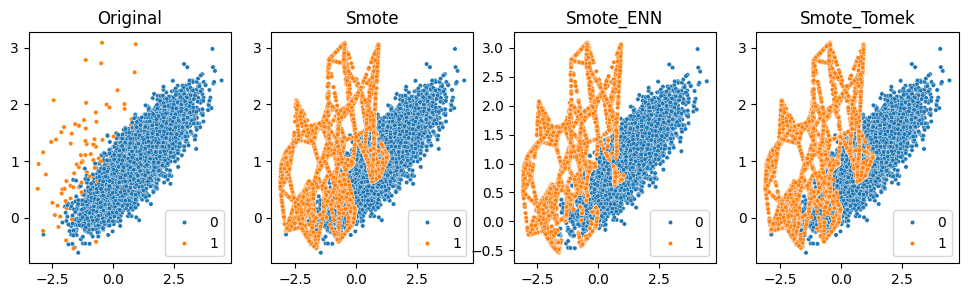

In [41]:
plt.figure(figsize=[12, 3])
plt.subplot(1, 4, 1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, s=10)  # s是點點的大小 小一點會比較好
plt.title("Original")

plt.subplot(1, 4, 2)
sns.scatterplot(x=X_smote[:,0], y=X_smote[:,1], hue=y_smote, s=10)
plt.title("Smote")

plt.subplot(1, 4, 3)
sns.scatterplot(x=X_smote_enn[:,0], y=X_smote_enn[:,1], hue=y_smote_enn, s=10)
plt.title("Smote_ENN")

plt.subplot(1, 4, 4)
sns.scatterplot(x=X_smote_tomek[:,0], y=X_smote_tomek[:,1], hue=y_smote_tomek, s=10)
plt.title("Smote_Tomek")
plt.show()

# 比較第三四張圖 enn有消除中間大重疊橘色的部分 tomek

### <font color=#0000FF>【wdbc威斯康辛乳腺癌診斷資料】</font>
威斯康辛乳腺癌診斷資料 : <https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data>

1. ID number
2. Diagnosis (M = malignant, B = benign) : （M =惡性，B =良性）

3-32 , Ten real-valued features are computed for each cell nucleus:
3. radius (mean of distances from center to points on the perimeter) : 半徑（從中心到外圍點的距離的平均值）
4. texture (standard deviation of gray-scale values) : 紋理（灰度值的標準偏差）
5. perimeter : 周長
6. area : 面積
7. smoothness (local variation in radius lengths) : 平滑度（半徑長度的局部變化）
8. compactness (perimeter^2 / area - 1.0) : 密實度（周長^ 2 /面積-1.0）
9. concavity (severity of concave portions of the contour) : 凹度（輪廓凹部的嚴重程度）
10. concave points (number of concave portions of the contour) : 凹點（輪廓的凹入部分的數量）
11. symmetry : 對稱
12. fractal dimension ("coastline approximation" - 1) : 分形維數（“海岸線近似”-1）

In [ ]:
uri = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
colnames = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", 
           "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean",
           "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
           "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se",
           "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
           "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst",
           "symmetry_worst", "fractal_dimension_worst"]
data = pd.read_csv(uri, header=None, names=colnames)
print(data.shape)
print('---【分類個數】---')
print(data['diagnosis'].value_counts())

### <font color='blue'>【香菇的分類(有毒性p、可食用e)】</font>

> 1. 讀入資料集

In [ ]:
fname = 'C:/Data/PyMLData/mushrooms.csv'
data = pd.read_csv(fname)
data.head(3)

> 2. 先進行類別資料的編碼

> 3. 將資料集分為 X, y

> 4. 進行 SMOTE 的重複抽樣

### <font color='blue'>使用 sklearn.utils.resample，人工處理</font>
- Oversample Minority Class (過採少數類別)  
- Undersample Majority Class (欠採多數類別)   
- <font color='blue'>可食性蘑菇或毒蘑菇 為例。使用 SMOTE 會當掉(除非先進行編碼)</font>

---
- from sklearn.utils import resample
    - The default strategy implements one step of the bootstrapping
procedure.

##### 類別型資料沒辦法計算距離 
##### 所以需要先進行編碼

In [43]:
fname = r'D:/NTPU_class/ml/code/PyMLData/mushrooms.csv'
data = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')
data['class'].value_counts()


class
e    4208
p    3916
Name: count, dtype: int64

#### <font color='blue'>Oversample Minority Class</font>

##### 拔靴法 小量資料重複抽樣

In [45]:
# 拿出可食性的資料 
df_majority = data[data["class"] == "e"]       # 樣本數較多
# 拿出有毒性的資料
df_minority = data[data["class"] == "p"]       # 樣本數較少

# 挑出資料
df_minority_2 = resample(df_minority,
                         replace=True,
                         n_samples=4208,       # 樣本數較多的樣本筆數
                         random_state=None,    # seed
                         stratify=None,)       # stratify 分層抽樣
# 然後我們可以看下它們的比數! 就是剛剛上面的4208

# 然後再合併它們倆
df2 = pd.concat(
    [df_majority, df_minority_2], 
    axis=0, 
    verify_integrity=True,  # 檢查他的完整性
    ignore_index=True)      # 這個要讓它忽略 index 不然前面就需要有 reset index
print(df2["class"].value_counts())

# 要注意合併後的資料，要記得打亂順序，否則 "e" 在前，"p" 在後
# 上面都是可食性 下面都是有毒 切割太明顯不太好 
# 所以可能可以在這裡先打亂 或是切資料的時候再用shuffle打亂

class
e    4208
p    4208
Name: count, dtype: int64


#### <font color='blue'>Undersample Majority Class</font>

In [46]:
# 針對多的那個要去他改掉
df_majority = data[data["class"] == "e"]       # 樣本數較多
df_minority = data[data["class"] == "p"]       # 樣本數較少

df_majority_2 = resample(df_majority,
                         replace=False,
                         n_samples=3916,       # 樣本數較少的樣本筆數 所以比數要設定3916
                         random_state=None,    # seed
                         stratify=None,)

df3 = pd.concat([df_majority_2, df_minority], axis=0, verify_integrity=True, ignore_index=True)
print(df3["class"].value_counts())

# 你用這個方法也可以讓她 樣本多的多取一點 樣本少的少取一點 也是OK的

class
e    3916
p    3916
Name: count, dtype: int64


### <font color='red'>2. 處理遺漏資料(missing value)的插補(imputation)</font>

### <font color=#0000FF>MICE : Multiple Imputation by Chained Equations</font>
- 【參考資料】
    - [使用python進行缺失數據估算(missing data imputation in python)](https://www.twblogs.net/a/5cc8fee5bd9eee1ac30ba20d)
    - [Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html)
- 在缺失值填充中，python中有一些開源的方法。
    - 刪除法：如果資料夠多就刪掉ㄅ
    - 均值法：插入那個欄位的平均數/中位數 就是讓他有數值 但對模型影響不大
    - 迴歸法
    - KNN
    - MICE
    - EM

#### 刪除法

In [47]:
arry = np.array([[np.nan,     2,np.nan, 0],
                [     3,     4,np.nan, 1],
                [np.nan,np.nan,np.nan, 5],
                [     5,np.nan,     8,10]])
df = pd.DataFrame(arry, columns=np.asarray(['col1', 'col2', 'col3', 'col4']))
df

,col1,col2,col3,col4
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,5.0
3,5.0,NaN,8.0,10.0


In [48]:
df.dropna(axis = 1,                  # axis=0 : 刪 rows, axis=1 : 刪 columns
          how = 'any',               # 決定的策略
          # thresh = None,             # 非 None 的門檻值(筆數)
          subset = None,             # 依據哪些 columns 評估
          inplace = False,           # 不要異動 df 本身，只是將刪除後的結果回傳
          ignore_index = False)

,col4
0,0.0
1,1.0
2,5.0
3,10.0


In [49]:
df.dropna(axis = 0,                  # axis=0 : 刪 rows, axis=1 : 刪 columns
          # how = 'any',               # 決定的策略
          thresh = 3,                # 非 None 的門檻值(筆數)
          subset = None,             # 依據哪些 columns 評估
          inplace = False,           # 不要異動 df 本身，只是將刪除後的結果回傳
          ignore_index = False)
df

,col1,col2,col3,col4
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,5.0
3,5.0,NaN,8.0,10.0


In [50]:
df.dropna(axis = 0,                  # axis=0 : 刪 rows, axis=1 : 刪 columns
          # how = 'any',               # 決定的策略
          thresh = 2,              # 非 None 的門檻值(筆數)
          subset = ["col2", "col3", "col4"],             # 依據哪些 columns 評估
          inplace = False,           # 不要異動 df 本身，只是將刪除後的結果回傳
          ignore_index = False)

,col1,col2,col3,col4
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
3,5.0,NaN,8.0,10.0


#### <font color=blue>sklearn 的插補法 (imputation)</font>

#### 使用 SimpleImputer
- [sklearn.impute.SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
data = [[1, 2], [np.nan, 3], [7, 6]]
data = pd.DataFrame(data)
data

,0,1
0,1.0,2
1,NaN,3
2,7.0,6


In [53]:
# 老師說他差捕的話也都是用平均數 因為是中心點喔
imputer = SimpleImputer(missing_values=np.nan,
                        strategy='mean',         # "mean", "median", "most_frequent", "constant"
                        fill_value=None,         # 如果 strategy="constant" 就要配合使用 fill_value
                        copy=True,)
imputer.fit_transform(data)

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

#### 使用 KNNImputer
- [KNNImputer for Missing Value Imputation in Python using scikit-learn](https://datascienceplus.com/knnimputer-for-missing-value-imputation-in-python-using-scikit-learn/)

In [54]:
from sklearn.impute import KNNImputer

In [55]:
data = {'A':[100, 90, np.nan, 95], 
        'B': [30, 45, 56, np.nan], 
        'C':[np.nan, 40, 80, 98]} 
  
# creating a dataframe from list 
df = pd.DataFrame(data)
df
# 要驗證的話當然就要先把距離算出來

,A,B,C
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


#### <font color=red>計算彼此之間的距離，使用 sklearn.metrics.nan_euclidean_distances</font>

In [56]:
from sklearn.metrics import nan_euclidean_distances

In [57]:
nan_euclidean_distances(df)

array([[ 0.        , 22.07940217, 45.033321  ,  8.66025404],
       [22.07940217,  0.        , 50.80846386, 71.29866759],
       [45.033321  , 50.80846386,  0.        , 31.17691454],
       [ 8.66025404, 71.29866759, 31.17691454,  0.        ]])

In [58]:
# 類別產生物件 就是他的初始直
imputer = KNNImputer(missing_values=np.nan,
                     n_neighbors=2,            # 這裡資料很少所以設定成2就好惹 
                     metric='nan_euclidean',)
imputer.fit_transform(df)
# k鄰近就有一種物以類聚的感覺
# 這裡就是找到2個最相似的 然後把他們平均

array([[100. ,  30. ,  69. ],
       [ 90. ,  45. ,  40. ],
       [ 97.5,  56. ,  80. ],
       [ 95. ,  43. ,  98. ]])

#### 使用 fast_knn

In [59]:
from impyute.imputation.cs import fast_knn

In [60]:
arry = np.array([[np.nan,     2,np.nan, 0],
                [     3,     4,np.nan, 1],
                [np.nan,np.nan,np.nan, 5],
                [     5,np.nan,     8,10]])
print(arry)

[[nan  2. nan  0.]
 [ 3.  4. nan  1.]
 [nan nan nan  5.]
 [ 5. nan  8. 10.]]


In [61]:
arry = arry.astype(float)
arry.dtype
# fast_knn(arry, 2)
# 老師說算了 很少用 前面的比較常用
# 他底霸個底到很不開心
# 可能因為版本的相依性的問題所以會抱錯

dtype('float64')

#### 使用 mice 多重鏈結方程式差補法

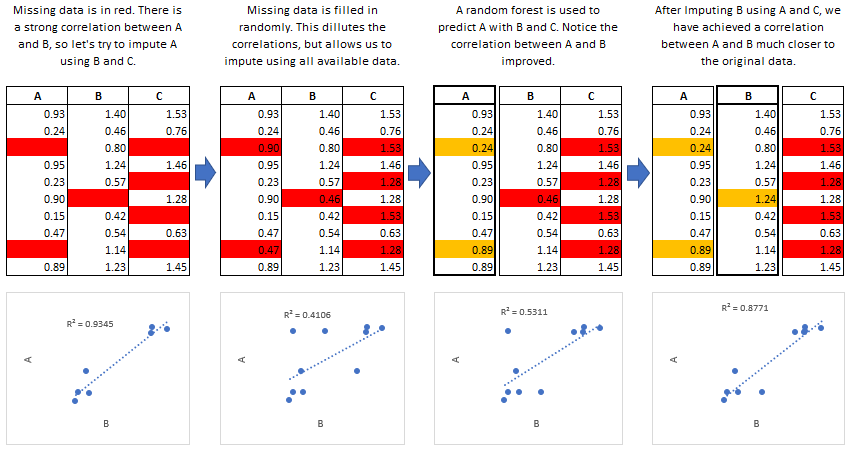</img>

In [62]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [63]:
arry = np.array([[np.nan,     2,np.nan, 0],
                [     3,     4,np.nan, 1],
                [np.nan,np.nan,np.nan, 5],
                [     5,np.nan,     8,10]])
print(arry)

[[nan  2. nan  0.]
 [ 3.  4. nan  1.]
 [nan nan nan  5.]
 [ 5. nan  8. 10.]]


In [64]:
imputer = IterativeImputer(missing_values=np.nan, max_iter=10)
imputer.fit_transform(arry)

array([[ 2.77783537,  2.        ,  8.        ,  0.        ],
       [ 3.        ,  4.        ,  8.        ,  1.        ],
       [ 3.88890383, 12.00009487,  8.        ,  5.        ],
       [ 5.        , 22.00020047,  8.        , 10.        ]])